IMPORTAMOS LIBRERIAS

In [22]:
import numpy as np
from keras.datasets import cifar10
from keras import models, layers, optimizers
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow import keras

IMPORTAMOS LA DATA

In [2]:
# dataset : https://keras.io/api/datasets/cifar10/
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 64s 0us/step


In [3]:
train_data.shape

(50000, 32, 32, 3)

In [4]:
train_labels.shape

(50000, 1)

In [5]:
train_labels[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

VISUALIZANDO LAS IMÁGENES



In [6]:
# Creando una lista de nombres de las clases
class_names = ['avión', 'automóvil', 'ave', 'gato', 'ciervo',
               'perro', 'sapo', 'caballo', 'barco', 'tractor']

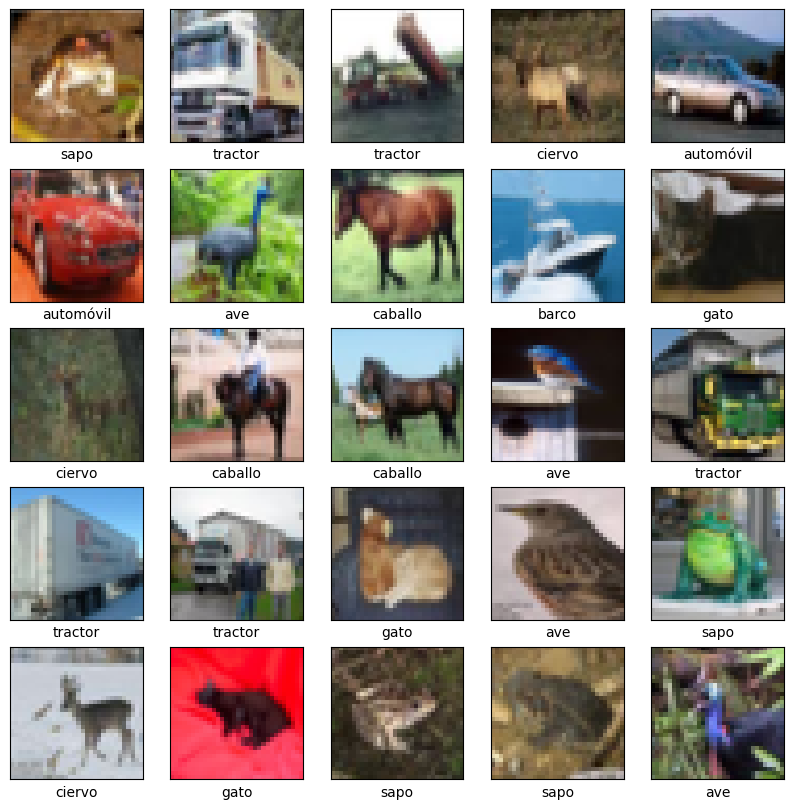

In [7]:
# Visualizando algunas imágenes en el dataset de entrenamiento
plt.figure(figsize=[10,10])
for i in range (25):    # para las primeras 5 imágenes
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

LIMPIEZA DE DATOS

In [8]:
x_train = train_data.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [9]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
print(train_labels[0])
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **SIN REGULARIZACIÓN**

In [24]:
ann1 = models.Sequential()
ann1.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(64,activation='relu'))
ann1.add(layers.Dense(32,activation='relu',))
ann1.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
ann1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 516)               1585668   
                                                                 
 dense_11 (Dense)            (None, 128)               66176     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 1662510 (6.34 MB)
Trainable params: 1662510 (6.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compilación**

In [27]:
### COMPILACIÓN de la ANN1
ann1.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

**Entrenamiento**

In [ ]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [28]:
### Entrenamiento de la ANN1
history = ann1.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40
88/88 [==============================] - 132s 1s/step - loss: 2.0764 - accuracy: 0.2391 - val_loss: 1.9075 - val_accuracy: 0.3154
Epoch 2/40
88/88 [==============================] - 12s 135ms/step - loss: 1.8632 - accuracy: 0.3352 - val_loss: 1.7883 - val_accuracy: 0.3616
Epoch 3/40
88/88 [==============================] - 12s 135ms/step - loss: 1.7721 - accuracy: 0.3652 - val_loss: 1.7580 - val_accuracy: 0.3530
Epoch 4/40
88/88 [==============================] - 13s 149ms/step - loss: 1.7190 - accuracy: 0.3822 - val_loss: 1.6906 - val_accuracy: 0.3876
Epoch 5/40
88/88 [==============================] - 13s 150ms/step - loss: 1.6655 - accuracy: 0.4045 - val_loss: 1.6567 - val_accuracy: 0.4056
Epoch 6/40
88/88 [==============================] - 13s 149ms/step - loss: 1.6252 - accuracy: 0.4187 - val_loss: 1.6193 - val_accuracy: 0.4148
Epoch 7/40
88/88 [==============================] - 13s 153ms/step - loss: 1.5734 - accuracy: 0.4392 - val_loss: 1.5608 - val_accuracy: 0.4380
E

## **CON REGULARIZACIÓN**

CONTRUCCIÓN DEL MODELO

In [11]:
model = models.Sequential()
model.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 516)               1585668   
                                                                 
 dense_1 (Dense)             (None, 128)               66176     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 1662510 (6.34 MB)
Trainable params: 1662510 (6.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ENTRENANDO EL MODELO

In [13]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40
88/88 [==============================] - 31s 218ms/step - loss: 2.1704 - accuracy: 0.2512 - val_loss: 1.9921 - val_accuracy: 0.3004
Epoch 2/40
88/88 [==============================] - 18s 206ms/step - loss: 1.9445 - accuracy: 0.3366 - val_loss: 1.8686 - val_accuracy: 0.3568
Epoch 3/40
88/88 [==============================] - 17s 192ms/step - loss: 1.8433 - accuracy: 0.3699 - val_loss: 1.8103 - val_accuracy: 0.3670
Epoch 4/40
88/88 [==============================] - 19s 215ms/step - loss: 1.7710 - accuracy: 0.3962 - val_loss: 1.7466 - val_accuracy: 0.3904
Epoch 5/40
88/88 [==============================] - 21s 237ms/step - loss: 1.7302 - accuracy: 0.4053 - val_loss: 1.7242 - val_accuracy: 0.4000
Epoch 6/40
88/88 [==============================] - 20s 228ms/step - loss: 1.6780 - accuracy: 0.4257 - val_loss: 1.6842 - val_accuracy: 0.4068
Epoch 7/40
88/88 [==============================] - 18s 207ms/step - loss: 1.6390 - accuracy: 0.4382 - val_loss: 1.6584 - val_accuracy: 0.4288

EVALUANDO EL DATASET

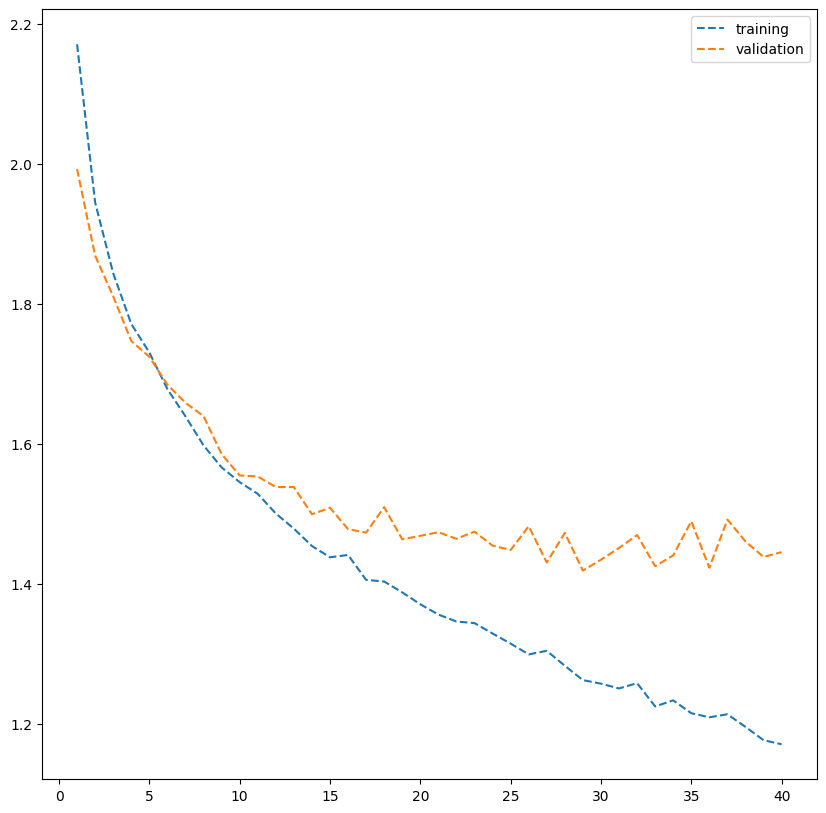

In [15]:
# loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, '--', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

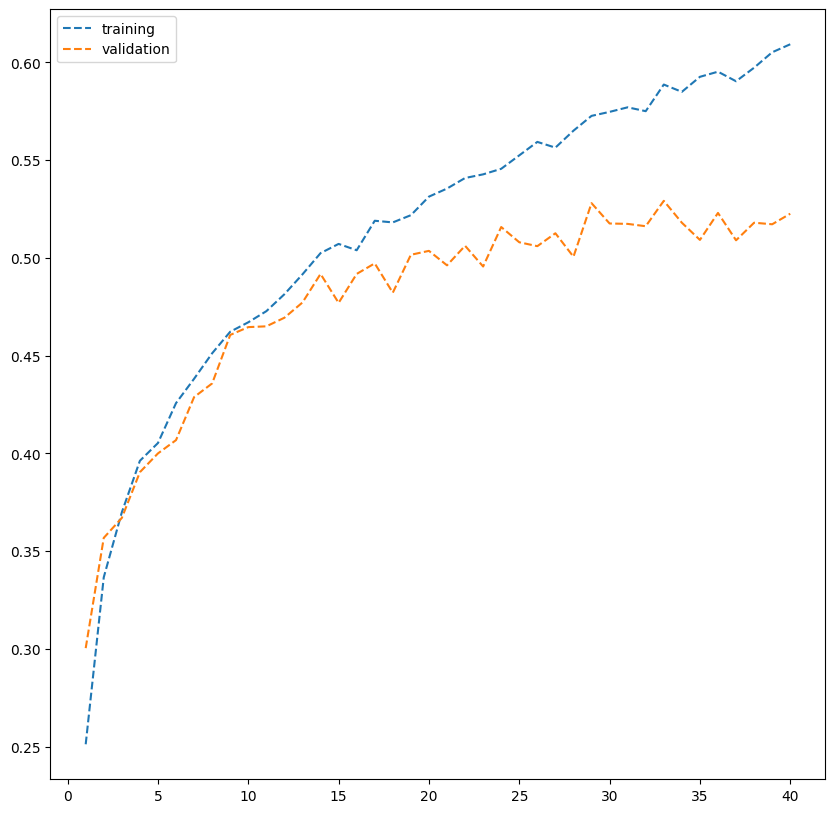

In [16]:
# accuracy
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(accuracy)+1)
plt.plot(epoch, accuracy, '--', label = 'training')
plt.plot(epoch, val_accuracy, '--', label = 'validation')
plt.legend()
plt.show()

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.4426 - accuracy: 0.5169


[1.4426158666610718, 0.5169000029563904]

PREDICCIONES

In [18]:
# Haciendo predicciones
y_predict = model.predict(x_test)

# Convirtiendo las predicciones en un label (tomando el valor máximo de predicción)
y_predict_classes = np.argmax(y_predict, axis=1)

313/313 [==============================] - 5s 13ms/step


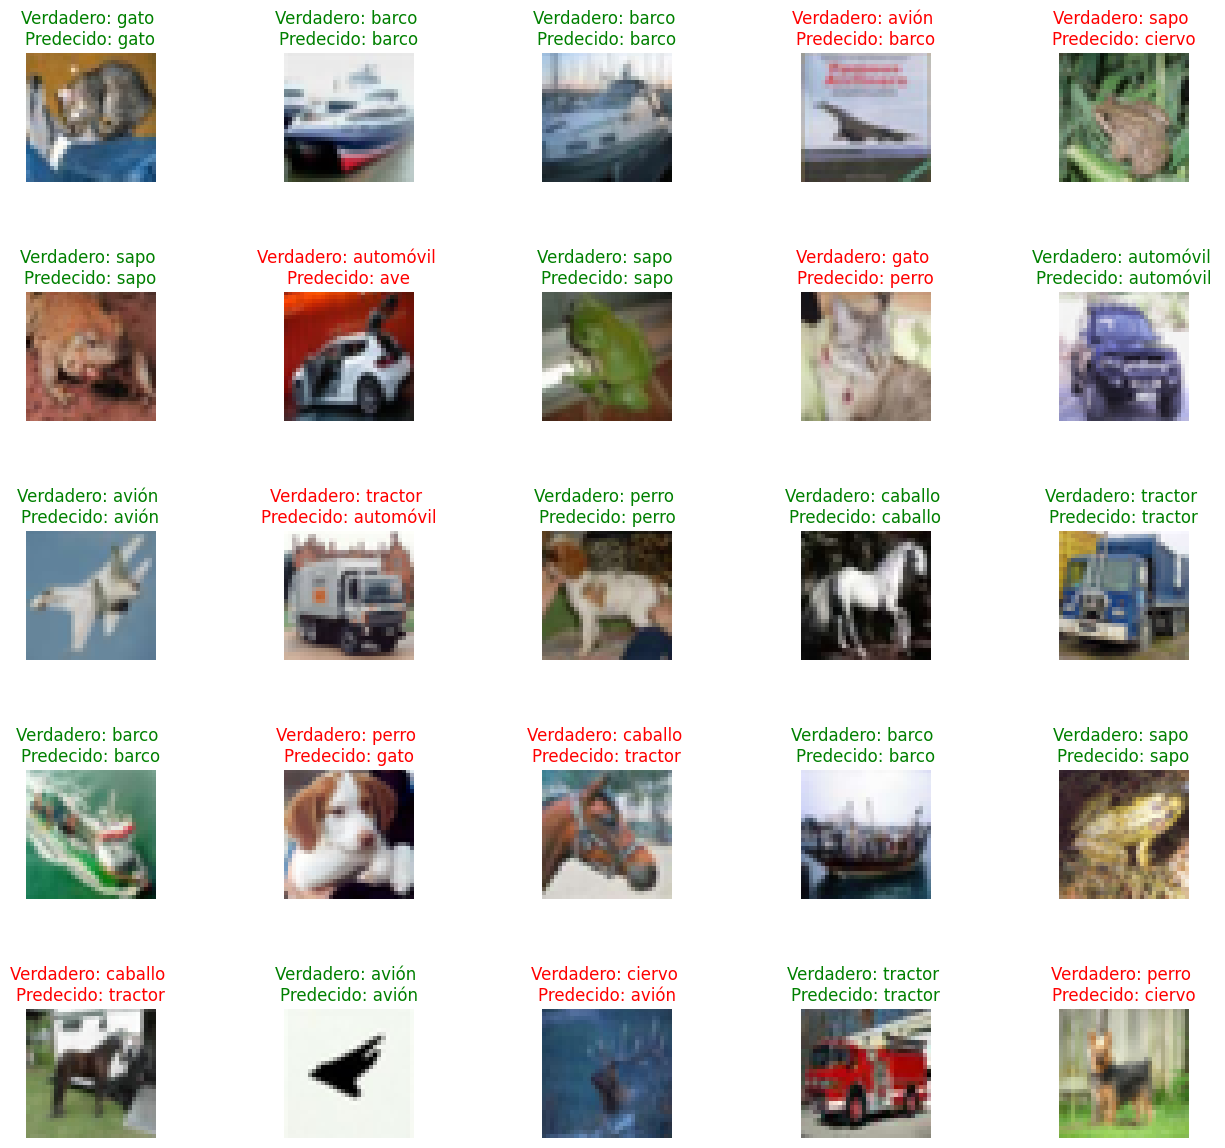

In [19]:
# Graficando Clase real vs. Clase predecidas

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_data[i])
    title_color = "green" if np.argmax(y_test[i]) == y_predict_classes[i] else "red"
    axes[i].set_title("Verdadero: %s \nPredecido: %s" % (class_names[np.argmax(y_test[i])], class_names[y_predict_classes[i]]), color=title_color)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [20]:
from tensorflow.keras import regularizers

**Definir Red con regularización**

In [21]:
### Dimesiones de la imagen
filas_img = 32
columnas_img = 32

In [ ]:
### ANN 2: red neuronal regularizada
ann2=keras.models.Sequential(
    [
    keras.layers.Flatten(input_shape=[filas_img, columnas_img]),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #La variable objetivo tiene 10 clases, por ello se usa 10 capas de salida
    ]
)

**Compilación**

In [ ]:
### COMPILACIÓN de la ANN1
ann2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Entrenamiento**

In [ ]:
### Entrenamiento de la ANN1
history_2 = ann2.fit(x_train2, y_train, epochs=15, validation_data=(x_test2, y_test))

**Historial de entrenamiento**

In [ ]:
### Listado de toda la data almacenada en 'history'
print(history_2.history.keys())

In [ ]:
### Visualización de las curvas de error
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
### Visualización de las curvas de error
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

**Definir Red con regularización**

In [ ]:
### ANN 3: red neuronal regularizada
ann3=keras.models.Sequential(
    [
    keras.layers.Flatten(input_shape=[filas_img, columnas_img]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') #La variable objetivo tiene 10 clases, por ello se usa 10 capas de salida
    ]
)

**Compilación**

In [ ]:
### COMPILACIÓN de la ANN1
ann3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Entrenamiento**

In [ ]:
### Entrenamiento de la ANN1
history_3 = ann3.fit(x_train2, y_train, epochs=15, validation_data=(x_test2, y_test))

**Historial de entrenamiento**

In [ ]:
### Listado de toda la data almacenada en 'history'
print(history_3.history.keys())

In [ ]:
### Visualización de las curvas de error
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
### Visualización de las curvas de error
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

## **CONCLUCIONES**